In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Input Parameters

#### LED parameters

In [2]:
led_half_angle=30;
p_led=6;

#### Signal parameters

In [3]:
sig_length=1000;
nsamp=10;
# bit_rate_vect=0.5:0.5:5; # Mbps
bit_rate_index=1;
# constellation_vect=[-0.5 0.5]; #OOK NRZ
# Receiver
PD_area=1;
Responsivity=0.2;

#### Room dimension

In [4]:

room_x=6;
room_y=6;
c2f=2;

n=1.5

#### Bits and errors tested


In [5]:
bits_to_test=1e7;
max_error=30;


In [324]:
n_Hmat=100 # number of samples

In [316]:
# def generate_tx_rx(u, v=2.75, x=0.5, y=0.5, n_tx_x= 2, n_tx_y= 2, n_rx_x= 2, n_rx_y= 2):
def generate_tx_rx(u, v=2.75, x=1.5, y=1.5, n_tx=10, n_rx=10):
    
    '''
        (u,v)
        
    '''
    n_tx_x= n_tx
    n_tx_y= n_tx
    n_rx_x= n_rx
    n_rx_y= n_rx

    tx=np.zeros((n_tx_x,n_tx_y,2));



    rx=np.zeros((n_rx_x,n_rx_y,2));

    for i in range(n_tx_x):
        for j in range(n_tx_y):
            tx[i,j]=[x+i*0.25, y+j*0.25]



    for i in range (n_rx_x):
        for j in range (n_rx_y):
            rx[i,j]=[u, v+j*0.05]
    return tx.reshape(-1,2), rx.reshape(-1,2)



def distance_and_angle(tx, rx, c2f=c2f):
    d=np.zeros((len(tx),len(rx)))
    a=np.zeros((len(tx),len(rx)))
    c=0
    for i,tx_i in enumerate(tx):
        for j, rx_j in enumerate(rx):
            d[i,j]=np.sqrt(sum((tx_i-rx_j)**2)+c2f**2)
            a[i,j]=np.arctan(np.sqrt(sum((tx_i-rx_j)**2))/c2f)
            
            c=c+1
            
    return d, a


##### Lambertian parameter:

$m=\frac{-\ln{2}}{\log{(\cos{\phi_{1/2}})}}$

##### Here, $\phi_{1/2}$ is half power angle

In [304]:
lamb_order=-np.log(2)/np.log(np.cos(np.deg2rad(led_half_angle)))
lamb_order

4.81884167930642

$g(\psi) = \begin{cases} 
\frac{n^2}{\sin^2 \Psi_{\text{con}}}, & 0 \leq \Psi \leq \Psi_{\text{con}} \\
0, & 0 \geq \Psi 
\end{cases}$

##### $g(\psi)$ is optical gain and $\psi$ is the FOV

$
H_{\text{LoS}} = 
\begin{cases} 
\frac{(m + 1)}{2\pi d^2} \cos^m(\psi)g(\psi)\cos(\psi), & 0 \leq \psi \leq \psi_{\text{FoV}} \\
0, & \text{otherwise}
\end{cases}
$

In [326]:
Hmat_all=np.zeros((n_Hmat,len(tx),len(rx)))

for i in range(n_Hmat):
    tx, rx=generate_tx_rx(u=np.random.uniform(0.0, 6.0))
    d, a=distance_and_angle(tx, rx)

    
    oc_gain = n**2 * PD_area / (np.matmul(np.sin(a),np.sin(a)))

    Hmat=((lamb_order+1)*(np.cos(a)**lamb_order)*np.cos(a)*oc_gain*p_led)/(2*np.pi*d**2)
    
    Hmat_all[i,:,:]=Hmat
    

(-0.5, 99.5, 99.5, -0.5)

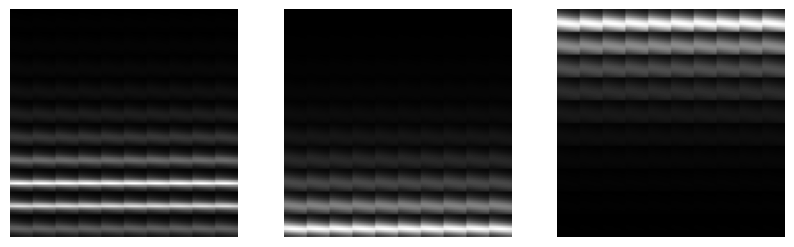

In [358]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(Hmat_all[np.random.randint(0,n_Hmat)],cmap="gray")
plt.axis("off")

plt.subplot(132)
plt.imshow(Hmat_all[np.random.randint(0,n_Hmat)],cmap="gray")
plt.axis("off")

plt.subplot(133)
plt.imshow(Hmat_all[np.random.randint(0,n_Hmat)],cmap="gray");
plt.axis("off")
